In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import ternary # ternary plot has a bug
import plotly.express as px
import h5py
import matplotlib as mpl

# import geopandas as gpd
import math

from matplotlib.patches import Circle, Wedge, Polygon

import os
import matplotlib.patheffects as path_effects


from netCDF4 import Dataset as NetCDFFile 

# for beachball - there are some error with using obspy
from pyrocko.plot import beachball
from pyrocko import moment_tensor as ptm

import cartopy.crs as ccrs
import cartopy.mpl.geoaxes

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from pathlib import Path
%matplotlib inline

import harmonica as hm

from obspy.core import UTCDateTime

from datetime import datetime, timezone

import seaborn as sns
sns.set()
sns.set_style(style='white') 
sns.set_style("ticks", {"xtick.major.size": 0.5, "ytick.major.size": 0.5})

In [2]:
data = pd.read_csv('SUeq_data.csv', header = 'infer')
# data = pd.read_csv('sum_with_2005_eqs.csv', header = 'infer')

data.sort_values(by = 'MW', ascending = False, inplace = True)

data['DATE'] = pd.to_datetime(data['DATE']) # change dtype to datetime format
data['DATE'] = data['DATE'].dt.strftime('%Y-%m-%d') # change dtype to object

In [3]:
data.columns

Index(['LON', 'LAT', 'DEPTH', 'DATE', 'TIME', 'EVENT_ID', 'DEPFIX', 'DEPQUAL',
       'EX', 'MO', 'MW', 'EX.1', 'MRR', 'MTT', 'MPP', 'MRT', 'MTP', 'MPR',
       'STRIKE', 'DIP', 'RAKE', 'STRIKE.1', 'DIP.1', 'RAKE.1', 'EX.2', 'T_VAL',
       'T_PL', 'T_AZM', 'P_VAL', 'P_PL', 'P_AZM', 'N_VAL', 'N_PL', 'N_AZM',
       'SLAB_DIP', 'CLASS', 'P(km)', 'Q(km)', 'R(deg)', 'S(deg)', 'ALONG',
       'PROF', 'TTSUM', 'SINSQ_T', 'SINSQ_SS', 'SINSQ_N', 'TYPE', 'CORR_T_PL',
       'CORR_N_PL', 'CORR_P_PL', 'SINSQ_T_2', 'SINSQ_SS_2', 'SINSQ_N_2',
       'TYPE_2', 'CLASS1', 'TYPE1', 'Unnamed: 56', 'CLASS.1', 'Unnamed: 58',
       'Unnamed: 59'],
      dtype='object')

In [4]:
# data['DATE'] and data['TIME'] should be object (str) to perform + operator

data_dummy = np.array(data['DATE'] + ' ' + data['TIME'])

data_ev_time = []

for val in data_dummy:
    data_ev_time.append(UTCDateTime(val))

    
ref_date = data_ev_time[0]

data_ev_time = np.array(data_ev_time)

date = []

for val in data_ev_time:
    date.append(val - ref_date)
    
date = np.array(date) # this is in seconds

data['YEARS'] = date/31536000

data = data.sort_values(by ='YEARS', ascending=True) # this is an important step

In [5]:
data_100 = data[(data['P(km)'] > 0)]
data_UP = data_100.loc[data['CLASS'] == 'UPPER']
# data_slab = data[(data['P(km)'] > 0)] # only in the subducting slab at < 300 km
# data_DW = data_slab.loc[data['CLASS'] == 'DGOING']
# data_MT = data.loc[data['CLASS'] == 'MTHRUST']

In [6]:
# # data_T_UP = data_UP.loc[data_UP['TYPE'] == 'THRUST']

# data_UP = data_UP[(data_UP['LAT'] >= -6) & (data_UP['LAT'] <= 6)]

# data_df = data_UP.sort_values(by = 'YEARS',ascending=True)
# data_along_pos_T = pd.unique(data_df['YEARS'])
# data_along_energy_T = []

# grp = data_df.groupby('YEARS')

# for pos in data_along_pos_T:
#     to_proc = grp.get_group(pos) 
#     exp = np.asarray(to_proc['EX'])
#     mo = np.asarray(to_proc['MO'])
#     energy = mo*np.power(10., exp)
#     data_along_energy_T.append(np.sum(energy))
    
# data_along_energy_T = np.asarray(data_along_energy_T)

# fig = plt.figure(dpi = 150)
# fig.set_figheight(4)

# plt.plot(data_along_pos_T, data_along_energy_T, 'o', markersize = 6, color = 'k', alpha=0.5,
#          mfc = 'red', mew = 0.8, lw = 0.8)

# plt.yscale('log')

# # plt.bar(data_along_pos_T, data_along_energy_T, color = 'k', linewidth = 0.1, edgecolor = 'k', width = 0.05, alpha = 0.3, label= 'Seismic Moment Release')
# # plt.axhline(y = 0, color = 'k', linestyle = '-', linewidth = 0.5)

# plt.xlim([-1, 1])
# plt.ylim([0e19, 2e18])

### Andaman upper plate

Text(0, 0.5, 'Mrr (N-m)')

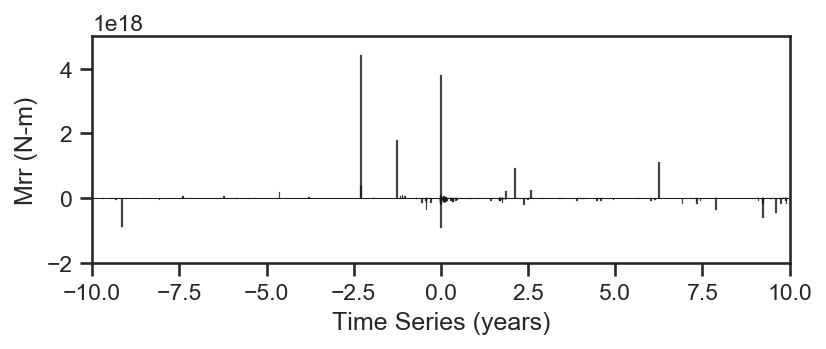

In [7]:
data_andaman = data_UP[(data_UP['LAT'] >= 6)]
# data_andaman = data_andaman[(data_andaman['DATE'] >= '1995-12-25')]

upt_exp = np.asarray(data_andaman['EX'])
upt_mo = np.asarray(data_andaman['MRR'])
upt_time = np.asarray(data_andaman['YEARS'])
upt_energy = upt_mo*np.power(10., upt_exp)
upt_energy_cum = np.cumsum(upt_energy)
# upt_sq = np.sqrt(upt_energy)
# upt_strain_cum = np.cumsum(upt_sq)

fig = plt.figure(dpi = 150)
fig.set_figheight(2)

# plt.plot(upt_time*12, upt_mo, '-o', markersize = 4, color = 'k', label = '6˚S-15˚N',
#          mfc = 'white', mew = 0.8, lw = 0.8)

plt.bar(upt_time, upt_energy, color = 'k', linewidth = 0.1, edgecolor = 'k', width = 0.05, alpha = 0.8, label= 'Seismic Moment Release')
plt.axhline(y = 0, color = 'k', linestyle = '-', linewidth = 0.5)


# plt.text(6, 4, 'Compression', 
#          fontsize = 10, color = 'k')
# plt.text(6, -6, 'Extension', 
#          fontsize = 10, color = 'k')

# # plt.text(-1.5, -8, '2004 mainshock', 
# #          fontsize = 12, color = 'k')

# plt.text(-9.9, 5.5, '(a)', 
#          fontsize = 12, color = 'k')

plt.xlim([-10, 10])
plt.ylim([-20e17, 5e18])

# plt.yscale('log')

plt.xlabel('Time Series (years)')
plt.ylabel(r'Mrr (N-m)')

# plt.legend(loc = 'upper left', fontsize = 7)
# plt.title('Andaman upper plate', fontsize=12)
# plt.savefig('Mrr_andaman.jpg', dpi = 300, transparent= True, bbox_inches='tight')

### Sumatra upper plate

Text(0, 0.5, 'Mrr (N-m)')

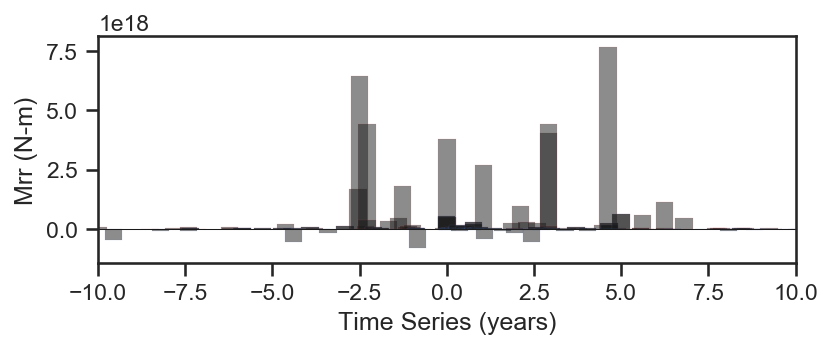

In [8]:
data_sum = data_UP[(data_UP['LAT'] >= -6) & (data_UP['LAT'] <= 6)]
data_sum_T = data_UP[(data_UP['MRR'] > 0)]
data_sum_N = data_UP[(data_UP['MRR'] < 0)]
# data_UP = data_UP[(data_UP['LAT'] >= 0)]
# data_UP = data_UP.loc[data_UP['TYPE'] == 'THRUST']
# data_sum = data_sum[(data_sum['DATE'] >= '1995-00-00')]

st_exp = np.asarray(data_sum_T['EX'])
st_mo = np.asarray(data_sum_T['MRR'])
st_time = np.asarray(data_sum_T['YEARS'])
st_energy = st_mo*np.power(10., st_exp)
st_energy_cum = np.cumsum(st_energy)


sn_exp = np.asarray(data_sum_N['EX'])
sn_mo = np.asarray(data_sum_N['MRR'])
sn_time = np.asarray(data_sum_N['YEARS'])
sn_energy = sn_mo*np.power(10., sn_exp)
sn_energy_cum = np.cumsum(sn_energy)


fig = plt.figure(dpi = 150)
fig.set_figheight(2)

# plt.plot(upt_time*12, upt_mo, '-o', markersize = 4, color = 'k', label = '6˚S-15˚N',
#          mfc = 'white', mew = 0.8, lw = 0.8)

plt.bar(st_time, st_energy, color = 'k', linewidth = 0.1, edgecolor = 'r', width = 0.5, alpha = 0.5, label= 'Seismic Moment Release')
plt.bar(sn_time, sn_energy, color = 'k', linewidth = 0.1, edgecolor = 'b', width = 0.5, alpha = 0.5, label= 'Seismic Moment Release')

plt.axhline(y = 0, color = 'k', linestyle = '-', linewidth = 0.5)

# plt.text(6, 5, 'Compression', 
#          fontsize = 10, color = 'k')
# plt.text(6, -5, 'Extension', 
#          fontsize = 10, color = 'k')

# plt.text(-1.5, -8, '2004 mainshock', 
#          fontsize = 7, color = 'k')

# plt.text(-9.9, 8, '(b)', 
#          fontsize = 12, color = 'k')

plt.xlim([-10, 10])
# plt.ylim([-1e18, 0.7e18])

# plt.yscale('log')

plt.xlabel('Time Series (years)')
plt.ylabel(r'Mrr (N-m)')

# plt.legend(loc = 'upper left', fontsize = 7)
# plt.title('Sumatra upper plate', fontsize=12)
# plt.savefig('Mrr_Sumatra.jpg', dpi = 300, transparent= True, bbox_inches='tight')

Text(0, 0.5, 'Mrr (N-m)')

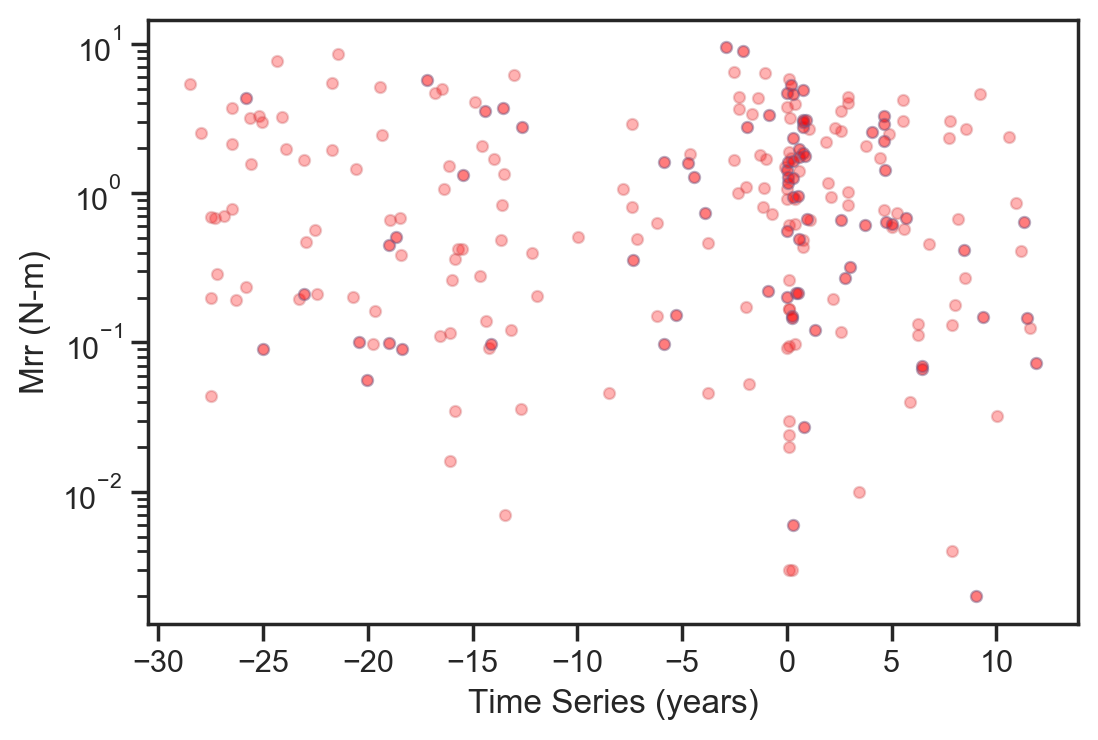

In [9]:
fig = plt.figure(dpi = 200)
fig.set_figheight(4)

plt.plot(st_time, st_mo, 'o', markersize = 4, color = 'r', alpha=0.3,
         mfc = 'red', mew = 0.8, lw = 0.8)

plt.plot(sn_time, sn_mo, 'o', markersize = 4, color = 'b', alpha=0.3,
         mfc = 'red', mew = 0.8, lw = 0.8)

plt.yscale('log')

# plt.bar(data_along_pos_T, data_along_energy_T, color = 'k', linewidth = 0.1, edgecolor = 'k', width = 0.05, alpha = 0.3, label= 'Seismic Moment Release')
# plt.axhline(y = 1e-1, color = 'k', linestyle = '-', linewidth = 0.5)

plt.xlabel('Time Series (years)')
plt.ylabel(r'Mrr (N-m)')

# plt.xlim([-1, 1])
# plt.ylim([0e19, 2e18])

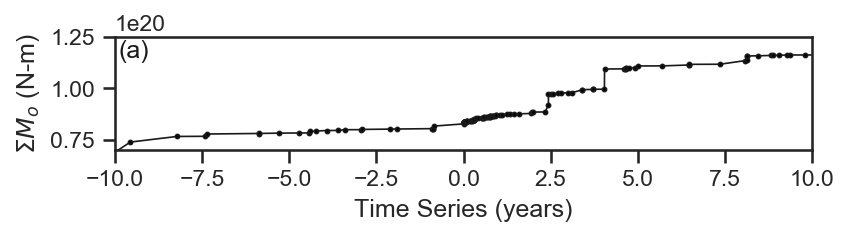

In [10]:
upt_exp = np.asarray(data_sum['EX'])
upt_mo = np.asarray(data_sum['MO'])
upt_time = np.asarray(data_sum['YEARS'])
upt_energy = upt_mo*np.power(10., upt_exp)
upt_energy_cum = np.cumsum(upt_energy)
# upt_sq = np.sqrt(upt_energy)
# upt_strain_cum = np.cumsum(upt_sq)

fig = plt.figure(dpi = 150)
fig.set_figheight(1)

plt.plot(upt_time, upt_energy_cum, '-o', markersize = 2, color = 'k', label = 'Sumatra upper plate (total)',
         mfc = 'black', mew = 0.8, lw = 0.8)

# plt.text(-1.5, 1.5e19, '2004 mainshock', 
#          fontsize = 7, color = 'k')

plt.text(-9.9, 1.15e20, '(a)', 
         fontsize = 12, color = 'k')

plt.ylim([0.7e20, 1.25e20])
plt.xlim([-10, 10])

# plt.yscale('log')

plt.xlabel('Time Series (years)')
plt.ylabel(r'$\Sigma M_o$ (N-m)')

# plt.legend(loc = 'upper left', fontsize = 6)
# plt.title('Sumatra upper plate (total)', fontsize=12)
plt.savefig('Mo_SUM_UP_total.jpg', dpi = 300, transparent= True, bbox_inches='tight')

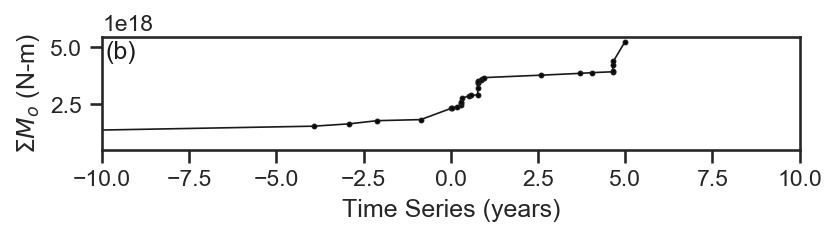

In [11]:
data_sum = data_sum.loc[data_sum['TYPE'] == 'THRUST']

upt_exp = np.asarray(data_sum['EX'])
upt_mo = np.asarray(data_sum['MO'])
upt_time = np.asarray(data_sum['YEARS'])
upt_energy = upt_mo*np.power(10., upt_exp)
upt_energy_cum = np.cumsum(upt_energy)
# upt_sq = np.sqrt(upt_energy)
# upt_strain_cum = np.cumsum(upt_sq)

fig = plt.figure(dpi = 150)
fig.set_figheight(1)

plt.plot(upt_time, upt_energy_cum, '-o', markersize = 2, color = 'k', label = 'Sumatra upper plate (thrust)',
         mfc = 'black', mew = 0.8, lw = 0.8)

# plt.text(-0.6, 0.12e18, '2004 mainshock', 
#          fontsize = 7, color = 'k')


plt.text(-9.9, 4.5e18, '(b)', 
         fontsize = 12, color = 'k')

# plt.annotate('2004 mainshock', xy = (0, 1e18), 
#              fontsize = 10, xytext = (1, 1e18), 
#              arrowprops = dict(facecolor = 'black'),
#              color = 'k')

# plt.yscale('log')

# plt.ylim([1.4e18, 7e18])
plt.xlim([-10, 10])

plt.xlabel('Time Series (years)')
plt.ylabel(r'$\Sigma M_o$ (N-m)')

# plt.legend(loc = 'upper left', fontsize = 6)
# plt.title('Sumatra upper plate (thrust)', fontsize=12)
plt.savefig('Mo_SUM_UP_thrust.jpg', dpi = 300, transparent= True, bbox_inches='tight')

### Sumatra forearc and back-arc

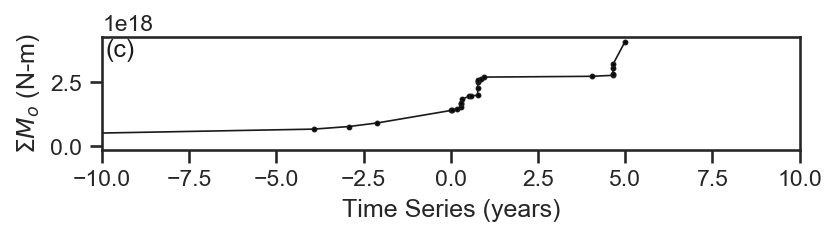

In [12]:
data_sum_FA = data_UP[(data_UP['LAT'] >= -6) & (data_UP['LAT'] <= 6)]
data_sum_FA = data_sum_FA.loc[data_sum_FA['TYPE'] == 'THRUST']
data_sum_FA = data_sum_FA[(data_sum_FA['P(km)'] < 200)]
# data_sum_FA = data_sum_FA[(data_sum_FA['DATE'] >= '1995-00-00')]

upt_exp = np.asarray(data_sum_FA['EX'])
upt_mo = np.asarray(data_sum_FA['MO'])
upt_time = np.asarray(data_sum_FA['YEARS'])
upt_energy = upt_mo*np.power(10., upt_exp)
upt_energy_cum = np.cumsum(upt_energy)
# upt_sq = np.sqrt(upt_energy)
# upt_strain_cum = np.cumsum(upt_sq)

fig = plt.figure(dpi = 150)
fig.set_figheight(1)

plt.plot(upt_time, upt_energy_cum, '-o', markersize = 2, color = 'k', label = 'Sumatra forearc (thrust)',
         mfc = 'black', mew = 0.8, lw = 0.8)

# plt.text(-0.6, 0.12e18, '2004 mainshock', 
#          fontsize = 7, color = 'k')


plt.text(-9.9, 3.5e18, '(c)', 
         fontsize = 12, color = 'k')

# plt.annotate('2004 mainshock', xy = (0, 1e18), 
#              fontsize = 10, xytext = (1, 1e18), 
#              arrowprops = dict(facecolor = 'black'),
#              color = 'k')

# plt.yscale('log')

# plt.ylim([4e17, 6e18])
plt.xlim([-10, 10])

plt.xlabel('Time Series (years)')
plt.ylabel(r'$\Sigma M_o$ (N-m)')

# plt.legend(loc = 'upper left', fontsize = 6)
# plt.title('Sumatra fore-arc (thrust)', fontsize=12)
plt.savefig('Mo_SUM_FA_thrust.jpg', dpi = 300, transparent= True, bbox_inches='tight')

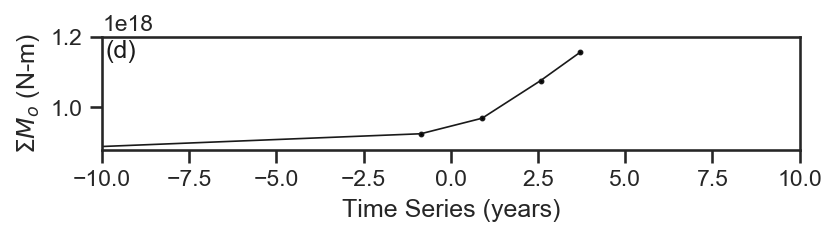

In [13]:
data_sum_BA = data_UP[(data_UP['LAT'] >= -6) & (data_UP['LAT'] <= 6)]
data_sum_BA = data_sum_BA.loc[data_sum_BA['TYPE'] == 'THRUST']
data_sum_BA = data_sum_BA[(data_sum_BA['P(km)'] > 200)]
# data_sum_BA = data_sum_BA[(data_sum_BA['DATE'] >= '1995-00-00')]

upt_exp = np.asarray(data_sum_BA['EX'])
upt_mo = np.asarray(data_sum_BA['MO'])
upt_time = np.asarray(data_sum_BA['YEARS'])
upt_energy = upt_mo*np.power(10., upt_exp)
upt_energy_cum = np.cumsum(upt_energy)
# upt_sq = np.sqrt(upt_energy)
# upt_strain_cum = np.cumsum(upt_sq)

fig = plt.figure(dpi = 150)
fig.set_figheight(1)

plt.plot(upt_time, upt_energy_cum, '-o', markersize = 2, color = 'k', label = 'Sumatra backarc (thrust)',
         mfc = 'black', mew = 0.8, lw = 0.8)

# plt.text(-0.6, 0.12e18, '2004 mainshock', 
#          fontsize = 7, color = 'k')


plt.text(-9.9, 1.14e18, '(d)', 
         fontsize = 12, color = 'k')

# plt.annotate('2004 mainshock', xy = (0, 1e18), 
#              fontsize = 10, xytext = (1, 1e18), 
#              arrowprops = dict(facecolor = 'black'),
#              color = 'k')

# plt.yscale('log')

plt.ylim([0.88e18, 1.2e18])
plt.xlim([-10, 10])

plt.xlabel('Time Series (years)')
plt.ylabel(r'$\Sigma M_o$ (N-m)')

# plt.legend(loc = 'upper left', fontsize = 6)
# plt.title('Sumatra back-arc (thrust)', fontsize=12)
plt.savefig('Mo_SUM_BA_thrust.jpg', dpi = 300, transparent= True, bbox_inches='tight')

### Long slab and short slab Mrr plots